# Lectura de la base de datos

In [1]:
import pandas as pd

Se modificaron las variables: BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageTyp, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature. Estas variables tenían una categoría llamada "NA", sin embargo, Python al momento de leer esa cadena la interpreta como dato faltante, por lo tanto se reemplazó el nombre de esa categoría por "NoA"

In [2]:
train = pd.read_csv("train.csv", index_col="Id")
test = pd.read_csv("test.csv", index_col="Id")
sample_submission = pd.read_csv("sample_submission.csv", index_col="Id")

En cuanto a las variables numéricas, si no se registróa valor no pasa nada si se reemplaza con 0 pues las variables numéricas representan longitudes no afecta.

In [3]:
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)

In [4]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NoA,Reg,Lvl,AllPub,Inside,...,0,NoA,NoA,NoA,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NoA,Reg,Lvl,AllPub,FR2,...,0,NoA,NoA,NoA,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NoA,IR1,Lvl,AllPub,Inside,...,0,NoA,NoA,NoA,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NoA,IR1,Lvl,AllPub,Corner,...,0,NoA,NoA,NoA,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NoA,IR1,Lvl,AllPub,FR2,...,0,NoA,NoA,NoA,0,12,2008,WD,Normal,250000


# Revisión de la lectura de los datos
 Es importante revisar que el tipo de dato de cada variable sea el adecuado y si no, definirlo de forma correcta. También debe verificarse que las celdas no contengan NaN

In [5]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Var 00 MSSubClass
Por definición de los datos la variable MSSubClass
aunque toma valores enteros realmente es una variable categórica,
pues indica el tipo de vivienda involucrada en la venta, por lo tanto,
debe trabajarse como variable catégorica y no numérica.

In [6]:
train['MSSubClass'] = train['MSSubClass'].astype('category')
print(train['MSSubClass'].dtype)
print(train['MSSubClass'].isnull().sum())
## este cambio tambien lo hacemos en test
test['MSSubClass'] = test['MSSubClass'].astype('category')

category
0


## Var 01 MSZoning

Por definición esta variable es categórica, así que **está bien definida**.

In [7]:
print(train['MSZoning'].dtype)
print(train['MSZoning'].isnull().sum())

object
0


## Var 02 LotFrontage
Esta variable representa una medida en pies de la calle conectada a
la propiedad, por lo tanto, como flotante **está bien definida**.

In [8]:
print(train['LotFrontage'].dtype)
print(train['LotFrontage'].isnull().sum())

float64
0


## Var 03 LotArea
Representa la medida del lote en pies cuadrados, si se identificó como
entero significa que ningún registro tiene una medida decimal, lo que
es raro pero ya ni modo, **el tipo de dato está bien definido**

In [9]:
print(train['LotArea'].dtype)
print(train['LotArea'].isnull().sum())

int64
0


## Var 04 Street
Igualmente **está bien definida**, representa si calle está
pavimentada o es grava.

In [10]:
print(train['Street'].dtype)
print(train['Street'].isnull().sum())

object
0


## Var 05 Alley
Igualmente **está bien definida**, representa si el acceso a la calle está
pavimentada o es grava.

In [11]:
print(train['Alley'].dtype)
print(train['Alley'].isnull().sum())

object
0


## Var 06 LotShape
Representa la forma del lote, **está bien definida**.

In [12]:
print(train['LotShape'].dtype)
print(train['LotShape'].isnull().sum())

object
0


## Var 07 LandContour
Representa la inflación de la propiedad, **está bien definida**.

In [13]:
print(train['LandContour'].dtype)
print(train['LandContour'].isnull().sum())

object
0


## Var 08 Utilities
Variable categórica que indica los serivios que tiene la propiedad (agua, luz, gas, etc). **Está bien definida**.

In [14]:
print(train['Utilities'].dtype)
print(train['Utilities'].isnull().sum())

object
0


## Var 09 LotConfig
Representa si la propiedad está en una cerrada, sobre la avenida, en esquina o es un predio dentro de otro, etc. **Está bien definida**.

In [15]:
print(train['LotConfig'].dtype)
print(train['LotConfig'].isnull().sum())

object
0


## Var 10 LandSlope
Indica si la propiedad está sobre terreno plano o si tiene cierta inclinación. **Está bien definido**.

In [16]:
print(train['LandSlope'].dtype)
print(train['LandSlope'].isnull().sum())

object
0


## Var 11 Neighborhood
Localización física dentro de los límites de Ames City. **Está bien definida**.

In [17]:
print(train['Neighborhood'].dtype)
print(train['Neighborhood'].isnull().sum())

object
0


## Var 12 Condition1
Proximidad a varias condiciones (cerca a una avenida principal, etc.) **Está bien definida**.

In [18]:
print(train['Condition1'].dtype)
print(train['Condition1'].isnull().sum())

object
0


## Var 13 Condition2
Igualmente a la anterior es categórica, **está bien definida**.

In [19]:
print(train['Condition2'].dtype)
print(train['Condition2'].isnull().sum())

object
0


## Var 14 BldgType
Tipo de vivienda (1 familia, originalmente contruida para 1 familia y adaptada para 2, duplex, etc.). **Está bien definida**.

In [20]:
print(train['BldgType'].dtype)
print(train['BldgType'].isnull().sum())

object
0


## Var 15 HouseStyle
Estilo de vivienda.**Está bien definida**.

In [21]:
print(train['HouseStyle'].dtype)
print(train['HouseStyle'].isnull().sum())

object
0


## Var 16 OverallQual
Esta variable representa una calificación en la calidad de los materiales y acabados de la clase, aunque es categórica es una variable ordinal, entonces como entero está bien definida pues la calificación, el valor, sí proporcionan información, el 10 es Muy Excelente y el 1 en Muy Pobre. **está bien**.

In [22]:
print(train['OverallQual'].dtype)
print(train['OverallQual'].isnull().sum())

int64
0


## Var 17 OverallCond
Esta calificación representa una calificación en la condición de la casa, al igual que la anterior, **está bien definida**.

In [23]:
print(train['OverallCond'].dtype)
print(train['OverallCond'].isnull().sum())

int64
0


## Var 18 YearBuilt
Año de construcción, **está bien definida**.

In [24]:
print(train['YearBuilt'].dtype)
print(train['YearBuilt'].isnull().sum())

int64
0


## Var 19 YearRemodAdd
Añe de remodelación, mismo año que construcción sino ha sido remodelada, **está bien definida**.

In [25]:
print(train['YearRemodAdd'].dtype)
print(train['YearRemodAdd'].isnull().sum())

int64
0


## Var 20 RoofStyle
Tipo de techo, variable categ´rotica, **está bien definida**.

In [26]:
print(train['RoofStyle'].dtype)
print(train['RoofStyle'].isnull().sum())

object
0


## Var 21 RoofMatl
Material del techo, **está bien definida**.

In [27]:
print(train['RoofMatl'].dtype)
print(train['RoofMatl'].isnull().sum())

object
0


## Var 22 Exterior1st
Cuvierta del exterior de la casa, variable categórica, **está bien definida**.

In [28]:
print(train['Exterior1st'].dtype)
print(train['Exterior1st'].isnull().sum())

object
0


## Var 23 Exterior2nd
Si es que tiene otro material la fachada de la casa, variable categórica, **está bien definida**.

In [29]:
print(train['Exterior2nd'].dtype)
print(train['Exterior2nd'].isnull().sum())

object
0


## Var 24 MasVnrType
Tipo de revestimiento de mamposería, **está bien definida**.

In [30]:
print(train['MasVnrType'].dtype)
print(train['MasVnrType'].isnull().sum())

object
0


## Var 25 MasVnrArea
Área, en pies cuadrados, de recubriminetos de mampostería. **Está bien definida**.

In [31]:
print(train['MasVnrArea'].dtype)
print(train['MasVnrArea'].isnull().sum())

float64
0


## Var 26 ExterQual
Variable categorica de la calidad del material exterior. **está bien definida**.

In [32]:
print(train['ExterQual'].dtype)
print(train['ExterQual'].isnull().sum())

object
0


## Var 27 ExterCond
Evalúa la condición de lo materiales del exterior, variable categótica. **Está bien definida**.

In [33]:
print(train['ExterCond'].dtype)
print(train['ExterCond'].isnull().sum())

object
0


## Var 28 Foundation
Tipo de fundamento, **está bien definida**.

In [34]:
print(train['Foundation'].dtype)
print(train['Foundation'].isnull().sum())

object
0


## Var 29 BsmtQual
Evalúa el grosor de los fundamentos, variable categórica, **está bien definida**.

In [35]:
print(train['BsmtQual'].dtype)
print(train['BsmtQual'].isnull().sum())

object
0


## Var 30 BsmtCond
Condición general de los simientos, **está bien definida**.

In [36]:
print(train['BsmtCond'].dtype)
print(train['BsmtCond'].isnull().sum())

object
0


## Var 31 BsmtExposure
Se refiere a los miros de la entrada o jardín, **está bien definida**.

In [37]:
print(train['BsmtExposure'].dtype)
print(train['BsmtExposure'].isnull().sum())

object
0


## Var 32 BsmtFinType1
Calificación de los simientos terminados, **está bien definida**.

In [38]:
print(train['BsmtFinType1'].dtype)
print(train['BsmtFinType1'].isnull().sum())

object
0


## Var 33 BsmtFinSF1
Metros cuadrados terminado, **está bien definida**.

In [39]:
print(train['BsmtFinSF1'].dtype)
print(train['BsmtFinSF1'].isnull().sum())

int64
0


## Var 34 BsmtFinType2
rango de los simientos del área terminada, **está bien definida**.

In [40]:
print(train['BsmtFinType2'].dtype)
print(train['BsmtFinType2'].isnull().sum())

object
0


## Var 35 BsmtFinSF2
 pies cuadrados terminados, **está bien definida**.

In [41]:
print(train['BsmtFinSF2'].dtype)
print(train['BsmtFinSF2'].isnull().sum())

int64
0


## Var 36 BsmtUnfSF
pues cuadrados in terminar de área de simientos, **está bien definida**.

In [42]:
print(train['BsmtUnfSF'].dtype)
print(train['BsmtUnfSF'].isnull().sum())

int64
0


## Var 37 TotalBsmtSF
pies cuadrados totales de área de simientos, **está bien definida**.

In [43]:
print(train['TotalBsmtSF'].dtype)
print(train['TotalBsmtSF'].isnull().sum())

int64
0


## Var 38 Heating
tipo de califección, **está bien definida**.

In [44]:
print(train['Heating'].dtype)
print(train['Heating'].isnull().sum())

object
0


## Var 39 HeatingQC
Calidad de la caleffación, **está bien definida**.

In [45]:
print(train['HeatingQC'].dtype)
print(train['HeatingQC'].isnull().sum())

object
0


## Var 40 CentralAir
si/no tiene aire acondicionado centra, **está bien definida**.

In [46]:
print(train['CentralAir'].dtype)
print(train['CentralAir'].isnull().sum())

object
0


## Var 41 Electrical
Tipo de sistema eléctrico, **está bien definida**.

In [47]:
print(train['Electrical'].dtype)
print(train['Electrical'].isnull().sum())

object
0


## Var 42 1stFlrSF
Pies cuadrados del primer piso, **está bien definida**.

In [48]:
print(train['1stFlrSF'].dtype)
print(train['1stFlrSF'].isnull().sum())

int64
0


## Var 43 2ndFlrSF
Pies cuadrados del segundo piso, **está bien definida**.

In [49]:
print(train['2ndFlrSF'].dtype)
print(train['2ndFlrSF'].isnull().sum())

int64
0


## Var 44 LowQualFinSF
pies cuadrados de baja calidad, **está bien definida**.

In [50]:
print(train['LowQualFinSF'].dtype)
print(train['LowQualFinSF'].isnull().sum())

int64
0


## Var 45 GrLivArea
pies cuadrados de superficie habitable, **está bien definida**.

In [51]:
print(train['GrLivArea'].dtype)
print(train['GrLivArea'].isnull().sum())

int64
0


## Var 46 BsmtFullBath
Baños completos en el sótano, **está bien definida**.

In [52]:
print(train['BsmtFullBath'].dtype)
print(train['BsmtFullBath'].isnull().sum())

int64
0


## Var 47 BsmtHalfBath
Medios baños en el sótano, **está bien definida**.

In [53]:
print(train['BsmtHalfBath'].dtype)
print(train['BsmtHalfBath'].isnull().sum())

int64
0


## Var 48 FullBath
Baños completos, **está bien definida**.

In [54]:
print(train['FullBath'].dtype)
print(train['FullBath'].isnull().sum())

int64
0


## Var 49 HalfBath
Medios baños, **está bien definida**.

In [55]:
print(train['HalfBath'].dtype)
print(train['HalfBath'].isnull().sum())

int64
0


## Var 50 BedroomAbvGr
Recamaras sin incluir las de sótano, **está bien definida**.

In [56]:
print(train['BedroomAbvGr'].dtype)
print(train['BedroomAbvGr'].isnull().sum())

int64
0


## Var 51 KitchenAbvGr
Numero de cocinas en la casa, **está bien definida**.

In [57]:
print(train['KitchenAbvGr'].dtype)
print(train['KitchenAbvGr'].isnull().sum())

int64
0


## Var 52 KitchenQual
Calidad de la cocina, **está bien definida**.

In [58]:
print(train['KitchenQual'].dtype)
print(train['KitchenQual'].isnull().sum())

object
0


## Var 53 TotRmsAbvGrd
Habitaciones totales sin incluir baños, **está bien definida**.

In [59]:
print(train['TotRmsAbvGrd'].dtype)
print(train['TotRmsAbvGrd'].isnull().sum())

int64
0


## Var 54 Functional
Funcionalidad de la casa, **está bien definida**.

In [60]:
print(train['Functional'].dtype)
print(train['Functional'].isnull().sum())

object
0


## Var 55 Fireplaces
Número de chimeneas, **está bien definida**.

In [61]:
print(train['Fireplaces'].dtype)
print(train['Fireplaces'].isnull().sum())

int64
0


## Var 56 FireplaceQu
Calidad de las chimeneas, **está bien definida**.

In [62]:
print(train['FireplaceQu'].dtype)
print(train['FireplaceQu'].isnull().sum())

object
0


## Var 57 GarageType
ubicación del gargae, **está bien definida**.

In [63]:
print(train['GarageType'].dtype)
print(train['GarageType'].isnull().sum())

object
0


## Var 58 GarageYrBlt
año en que el garage se construyó, **está bien definida**.

In [64]:
print(train['GarageYrBlt'].dtype)
print(train['GarageYrBlt'].isnull().sum())

float64
0


## Var 59 GarageFinish
estatus del garage, **está bien definida**.

In [65]:
print(train['GarageFinish'].dtype)
print(train['GarageFinish'].isnull().sum())

object
0


## Var 60 GarageCars
Capacidad de carros en el garage, **está bien definida**.

In [66]:
print(train['GarageCars'].dtype)
print(train['GarageCars'].isnull().sum())

int64
0


## Var 61 GarageArea
pies cuadrados del garage, **está bien definida**.

In [67]:
print(train['GarageArea'].dtype)
print(train['GarageArea'].isnull().sum())

int64
0


## Var 62 GarageQual
Calidad del garage, **está bien definida**.

In [68]:
print(train['GarageQual'].dtype)
print(train['GarageQual'].isnull().sum())

object
0


## Var 63 GarageCond
condición del garage, **está bien definida**.

In [69]:
print(train['GarageCond'].dtype)
print(train['GarageCond'].isnull().sum())

object
0


## Var 64 PavedDrive
Pavimentado, variable categórica, **estábien definida**.

In [70]:
print(train['PavedDrive'].dtype)
print(train['PavedDrive'].isnull().sum())

object
0


## Var 65 WoodDeckSF
pies cuadrados de área decorada con madera, **está bien definida**.

In [71]:
print(train['WoodDeckSF'].dtype)
print(train['WoodDeckSF'].isnull().sum())

int64
0


## Var 66 OpenPorchSF
pies cuadrados de porch abierto, **está bien definida**.

In [72]:
print(train['OpenPorchSF'].dtype)
print(train['OpenPorchSF'].isnull().sum())

int64
0


## Var 67 EnclosedPorch
pies cuadrados de porch cerrado, **está bien definida**.

In [73]:
print(train['EnclosedPorch'].dtype)
print(train['EnclosedPorch'].isnull().sum())

int64
0


## Var 68 3SsnPorch
pies cuadrados de proch de tres estaciones Q_Q, ,**está bien definida**.

In [74]:
print(train['3SsnPorch'].dtype)
print(train['3SsnPorch'].isnull().sum())

int64
0


## Var 69 ScreenPorch
pies cuadrados de fachada del proch, **está bien definida**.

In [75]:
print(train['ScreenPorch'].dtype)
print(train['ScreenPorch'].isnull().sum())

int64
0


## Var 70 PoolArea
pies cuadrados de la superficie de la alberca, **está bien definida**.

In [76]:
print(train['PoolArea'].dtype)
print(train['PoolArea'].isnull().sum())

int64
0


## Var 71 PoolQC
Calidad de la alberca, **está bien definida**.

In [77]:
print(train['PoolQC'].dtype)
print(train['PoolQC'].isnull().sum())

object
0


## Var 72 Fence
calidad de la cerca, **está bien definida**.

In [78]:
print(train['Fence'].dtype)
print(train['Fence'].isnull().sum())

object
0


## Var 73 MiscFeature
articulos miscelaneos, **es´ta bien definida**.

In [79]:
print(train['MiscFeature'].dtype)
print(train['MiscFeature'].isnull().sum())

object
0


## Var 74 MiscVal
valor de los articulos miscelaneos, **está bien definida**.

In [80]:
print(train['MiscVal'].dtype)
print(train['MiscVal'].isnull().sum())

int64
0


## Var 75 MoSold
Mes de venta, **está bien definida**.

In [81]:
print(train['MoSold'].dtype)
print(train['MoSold'].isnull().sum())

int64
0


## Var 76 YrSold
año de venta, **está bien definida**.

In [82]:
print(train['YrSold'].dtype)
print(train['YrSold'].isnull().sum())

int64
0


## Var 77 SaleType
tipo de venta, **está bien definida**

In [83]:
print(train['SaleType'].dtype)
print(train['SaleType'].isnull().sum())

object
0


## Var 78 SaleCondition
condiciones en que se dio la venta, **está bien definida**

In [84]:
print(train['SaleCondition'].dtype)
print(train['SaleCondition'].isnull().sum())

object
0


## Var 79 SalePrice
Precio de venta, **está bien definida**.

In [85]:
print(train['SalePrice'].dtype)
print(train['SalePrice'].isnull().sum())

int64
0


## Resumen y comentarios
La variable 0 "MSSubClass", originalmente identificada como entero, es en realidad categórica.


Existe inconsistencia en cuanto a la categorización pues hay variables que evalúan calidad como "ExterQual" y "ExterCond" cuyas categórias son:

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
       
Sin embargo, "OverallCond" es:

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
       
Aunque ambas "miden" o "califican" unas decidieron hacerlo catgóricamente y otras numéricamente.

Se decidió dejar "OverallCond" como numérica.

# Breve análisis descriptivo de los datos

## Variables categóricas

Primeramente, si se realiza un histograma se puede inferir acerca de 
la distribución de los datos, por ejemplo, a continuación se realiza para aquellas variables que son categóricas, esto porque las variables numéricas 
sería mejor analizarlo con una matriz de correlación.

In [86]:
#Las variables que son object
import numpy as np
import copy
trainObj = train.select_dtypes(include=['object' or 'category']).copy()
#también lo hacemos para test
testObj = test.select_dtypes(include=['object'or 'category']).copy()
trainObj.head()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NoA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NoA,NoA,NoA,WD,Normal
2,RL,Pave,NoA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NoA,NoA,NoA,WD,Normal
3,RL,Pave,NoA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NoA,NoA,NoA,WD,Normal
4,RL,Pave,NoA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NoA,NoA,NoA,WD,Abnorml
5,RL,Pave,NoA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NoA,NoA,NoA,WD,Normal


<ipython-input-87-d937b5dcecfe>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


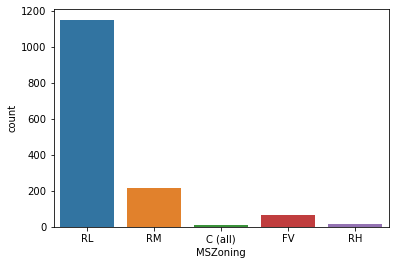

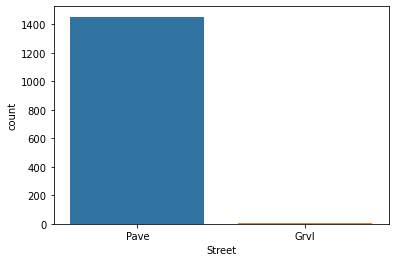

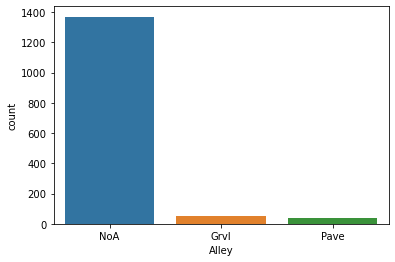

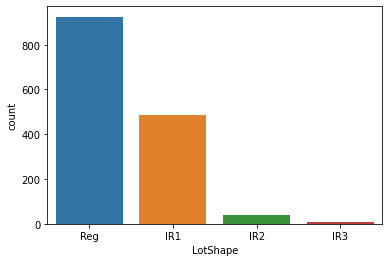

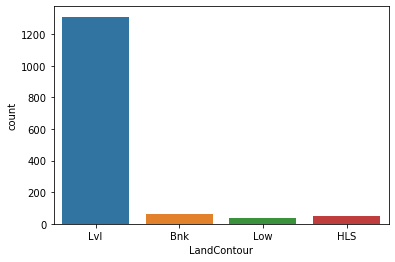

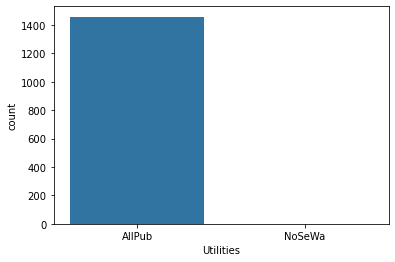

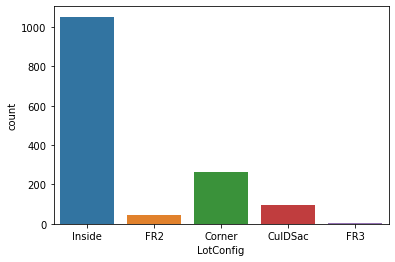

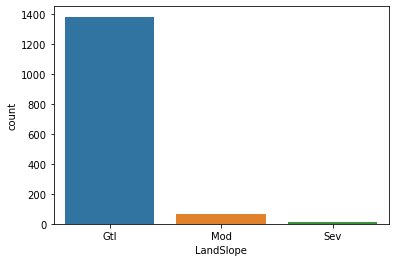

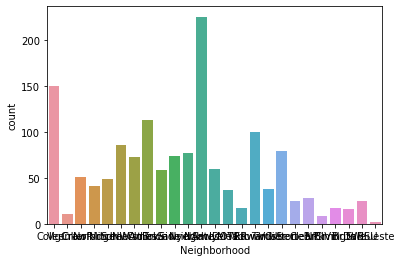

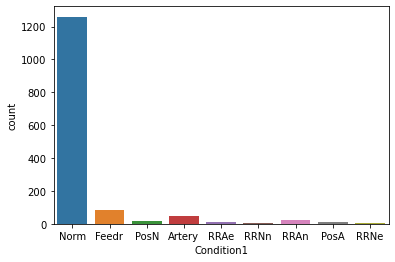

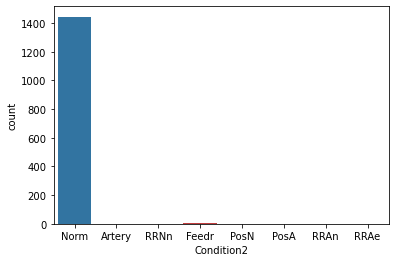

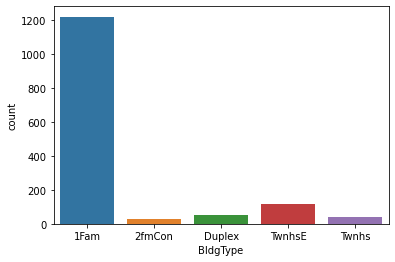

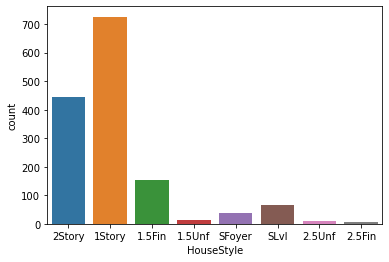

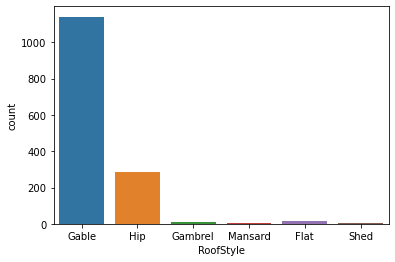

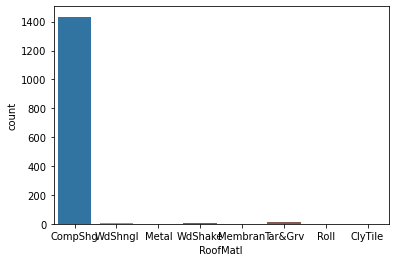

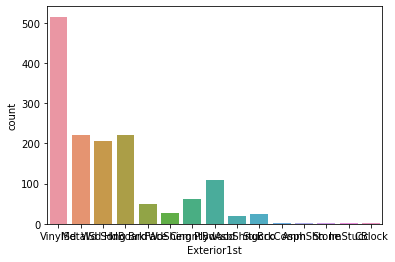

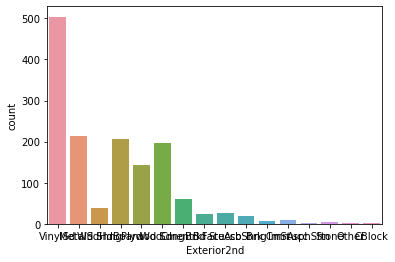

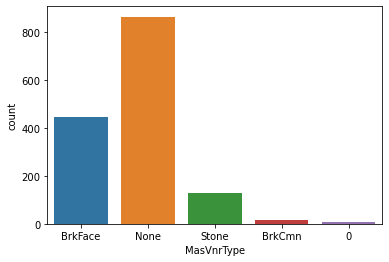

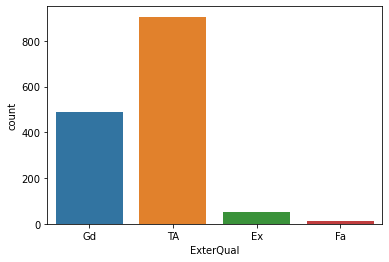

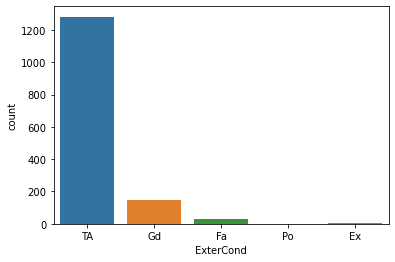

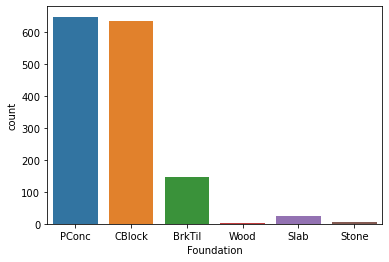

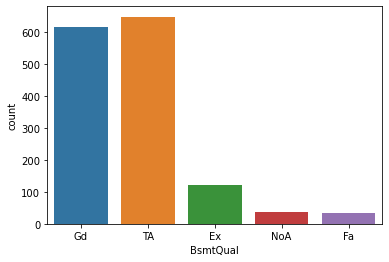

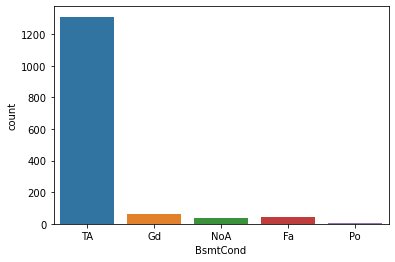

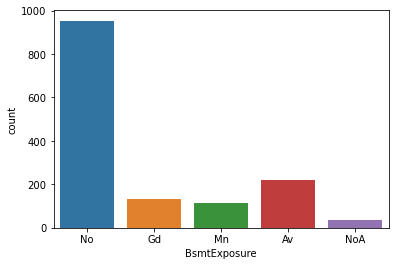

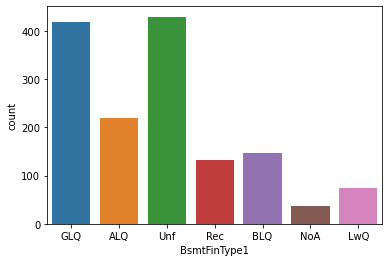

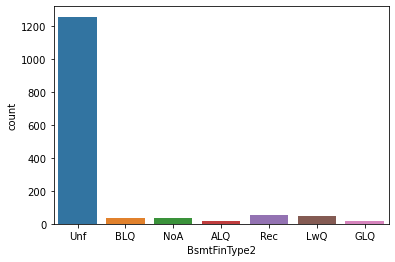

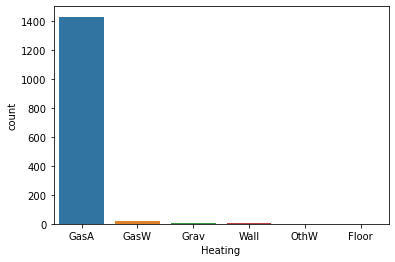

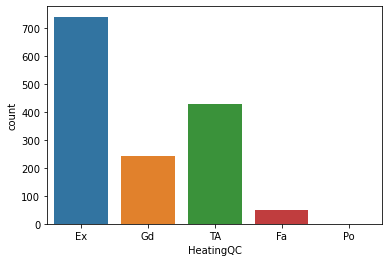

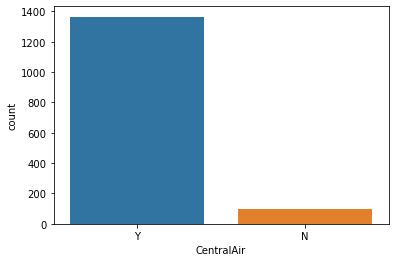

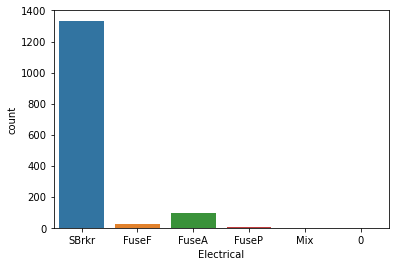

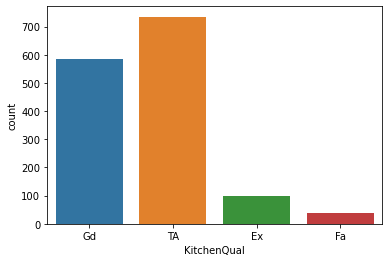

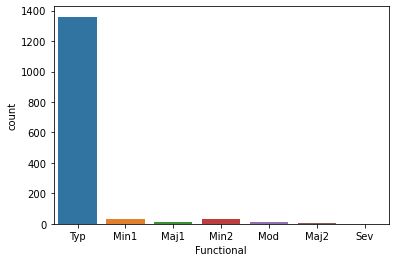

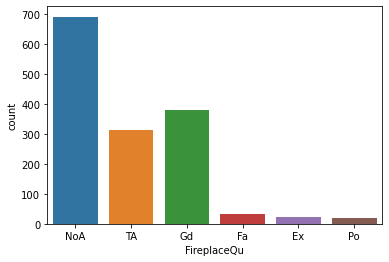

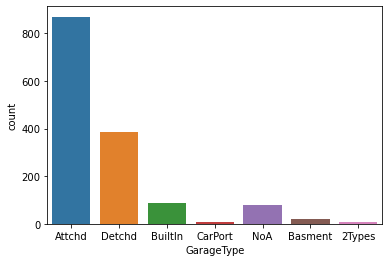

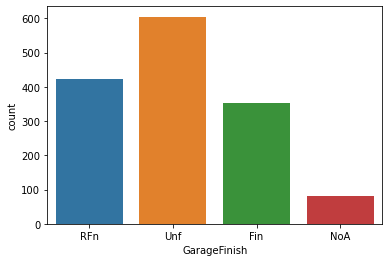

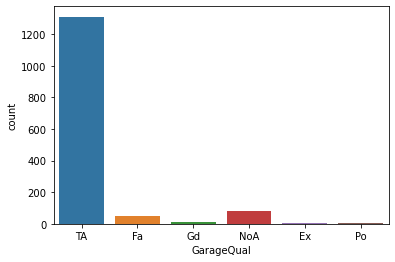

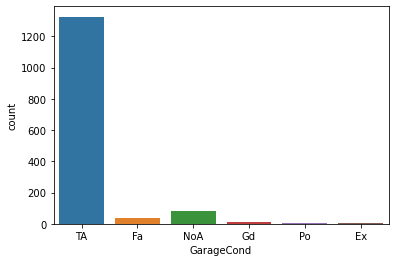

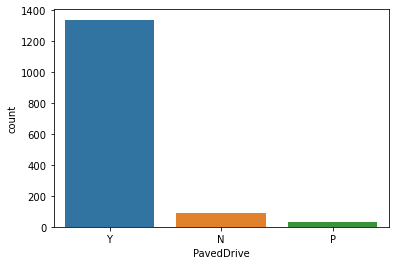

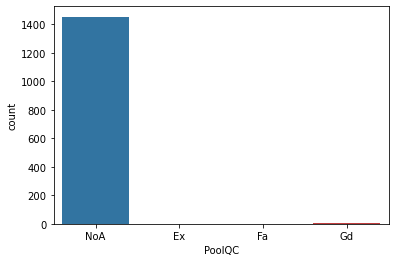

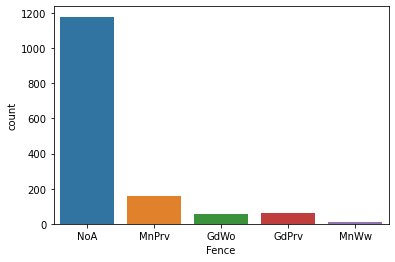

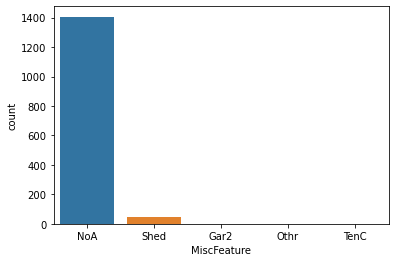

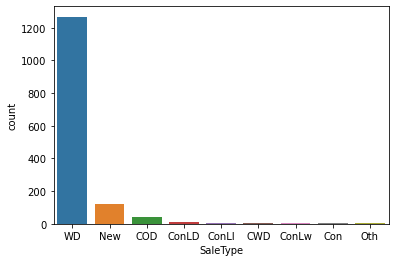

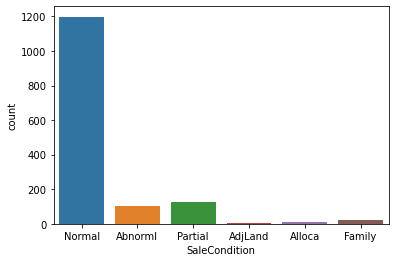

In [87]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
for i, col in enumerate(trainObj.columns):
    plt.figure(i)
    sns.countplot(x=col, data=trainObj)


### Conclusión
Existen varias variables que no tienen mucho sentido, por ejemplo "street"en la que casi el total de las casas pertencen a la categoría "Pave", o la variable "Utilities" sucede lo mismo, todas las casas son "AllPub", y también con "Condition2", "RoofMatl", "BsmtFinType2", "Heating", "Functional" y "PoolQC".
Seguramente el método LASSO hará que estas variables tengan coeficiente cero, pues realmente no describen/modelan el precio de venta.


In [88]:
#Variables explicativas categóricas
XtrainCat = trainObj.copy()
#también lo hacemos para test
XtestCat = test[XtrainCat.columns]
XtrainCat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NoA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NoA,NoA,NoA,WD,Normal
2,RL,Pave,NoA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NoA,NoA,NoA,WD,Normal
3,RL,Pave,NoA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NoA,NoA,NoA,WD,Normal
4,RL,Pave,NoA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NoA,NoA,NoA,WD,Abnorml
5,RL,Pave,NoA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NoA,NoA,NoA,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,NoA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NoA,NoA,NoA,WD,Normal
1457,RL,Pave,NoA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NoA,MnPrv,NoA,WD,Normal
1458,RL,Pave,NoA,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NoA,GdPrv,Shed,WD,Normal


## Variables numéricas

Para ver la matríz de correlaciones primero seleccionamos las variables numéricas de la base de datos Train

In [89]:
trainNum = train.select_dtypes(include=['int64' or 'float64']).copy()
trainNum

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,8450,7,5,2003,2003,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
2,9600,6,8,1976,1976,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
3,11250,7,5,2001,2002,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
4,9550,7,5,1915,1970,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,140000
5,14260,8,5,2000,2000,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,7917,6,5,1999,2000,0,0,953,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1457,13175,6,6,1978,1988,790,163,589,1542,2073,...,349,0,0,0,0,0,0,2,2010,210000
1458,9042,7,9,1941,2006,275,0,877,1152,1188,...,0,60,0,0,0,0,2500,5,2010,266500


Ahora busquemos variables que no estén correlacionadas con la variable respuesta.

In [90]:
MC=trainNum.corr()
SaleCorr=abs(MC.loc[:,"SalePrice"])
aux=SaleCorr.sort_values(ascending=False)
to_drop=aux.index[aux<0.1]
to_drop

Index(['PoolArea', 'OverallCond', 'MoSold', '3SsnPorch', 'YrSold',
       'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2'],
      dtype='object')

Las variables anteriores tienen una correlación menor a 0.1, no tiene caso que estén en el modelo, por lo tanto las quitamos de la matriz.

In [91]:
#Generamos la matriz de X de variables numéricas quitando la var resp
XtrainNum = trainNum.iloc[:,0:32].copy()
XtrainNum=XtrainNum.drop(XtrainNum[to_drop], axis=1).copy()
XtrainNum

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
Id,,,,,,,,,,,,,,,,,,,,,
1,8450,7,2003,2003,706,150,856,856,854,1710,...,3,1,8,0,2,548,0,61,0,0
2,9600,6,1976,1976,978,284,1262,1262,0,1262,...,3,1,6,1,2,460,298,0,0,0
3,11250,7,2001,2002,486,434,920,920,866,1786,...,3,1,6,1,2,608,0,42,0,0
4,9550,7,1915,1970,216,540,756,961,756,1717,...,3,1,7,1,3,642,0,35,272,0
5,14260,8,2000,2000,655,490,1145,1145,1053,2198,...,4,1,9,1,3,836,192,84,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,7917,6,1999,2000,0,953,953,953,694,1647,...,3,1,7,1,2,460,0,40,0,0
1457,13175,6,1978,1988,790,589,1542,2073,0,2073,...,3,1,7,2,2,500,349,0,0,0
1458,9042,7,1941,2006,275,877,1152,1188,1152,2340,...,4,1,9,2,1,252,0,60,0,0


In [92]:
print(XtrainNum.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   LotArea        1460 non-null   int64
 1   OverallQual    1460 non-null   int64
 2   YearBuilt      1460 non-null   int64
 3   YearRemodAdd   1460 non-null   int64
 4   BsmtFinSF1     1460 non-null   int64
 5   BsmtUnfSF      1460 non-null   int64
 6   TotalBsmtSF    1460 non-null   int64
 7   1stFlrSF       1460 non-null   int64
 8   2ndFlrSF       1460 non-null   int64
 9   GrLivArea      1460 non-null   int64
 10  BsmtFullBath   1460 non-null   int64
 11  FullBath       1460 non-null   int64
 12  HalfBath       1460 non-null   int64
 13  BedroomAbvGr   1460 non-null   int64
 14  KitchenAbvGr   1460 non-null   int64
 15  TotRmsAbvGrd   1460 non-null   int64
 16  Fireplaces     1460 non-null   int64
 17  GarageCars     1460 non-null   int64
 18  GarageArea     1460 non-null   int64
 19  WoodDe

A continuación, vamos a explorar la correlación entre las variables explicativas y filtramos aquellas que tienen una correlación (en valor absoluto) mayor que 0.6

In [93]:
import numpy as np
corr_matrix = XtrainNum.corr().abs()
#La mitad de arriba de la matriz de correlaciones en valores absolutos
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#Lista de variables con correlación mayor a 0.6
to_drop2 = [column for column in upper.columns if any(upper[column] > 0.6)]
to_drop2
#

['1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea']

Estas variables tienen una correlación mayor a 0.6 con alguna otra de las variables explicativas, por ejemplo, '1stFlrSF' tiene una correlación de 0.819530 con 'TotalBsmtSF', basta con dejar solo una de estas dos variables y el algoritmo anterior seleccionó a '1stFlrSF', 'GrLivArea' tiene una correlación de 0.687501 con '2ndFlrSF', basta con dejar solo una de estas dos variables y así sucesivamente.

In [94]:
corr_matrix.iloc[:,[7,9]]

,1stFlrSF,GrLivArea
LotArea,0.299475,0.263116
OverallQual,0.476224,0.593007
YearBuilt,0.281986,0.199010
YearRemodAdd,0.240379,0.287389
BsmtFinSF1,0.445863,0.208171
BsmtUnfSF,0.317987,0.240257
TotalBsmtSF,0.819530,0.454868
1stFlrSF,1.000000,0.566024
2ndFlrSF,0.202646,0.687501
GrLivArea,0.566024,1.000000


In [95]:
XtrainNum=XtrainNum.drop(XtrainNum[to_drop2], axis=1).copy()
XtrainNum

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
Id,,,,,,,,,,,,,,,
1,8450,7,2003,2003,706,150,856,854,3,1,0,0,61,0,0
2,9600,6,1976,1976,978,284,1262,0,3,1,1,298,0,0,0
3,11250,7,2001,2002,486,434,920,866,3,1,1,0,42,0,0
4,9550,7,1915,1970,216,540,756,756,3,1,1,0,35,272,0
5,14260,8,2000,2000,655,490,1145,1053,4,1,1,192,84,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,7917,6,1999,2000,0,953,953,694,3,1,1,0,40,0,0
1457,13175,6,1978,1988,790,589,1542,0,3,1,2,349,0,0,0
1458,9042,7,1941,2006,275,877,1152,1152,4,1,2,0,60,0,0


Y únicamente nos quedamos con 15 variables numéricas para inlcuir en el modelo.

In [96]:
#Preparamos la base de Test
XtestNum = test[XtrainNum.columns]

## Conclusión
La matriz de variables explicativas queda de la siguietne forma con 58 variables:


In [97]:
Xtrain = pd.merge(XtrainNum, XtrainCat, on='Id')
#lo mismo para test
Xtest = pd.merge(XtestNum, XtestCat, on='Id')
Xtrain.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,8450,7,2003,2003,706,150,856,854,3,1,...,Attchd,RFn,TA,TA,Y,NoA,NoA,NoA,WD,Normal
2,9600,6,1976,1976,978,284,1262,0,3,1,...,Attchd,RFn,TA,TA,Y,NoA,NoA,NoA,WD,Normal
3,11250,7,2001,2002,486,434,920,866,3,1,...,Attchd,RFn,TA,TA,Y,NoA,NoA,NoA,WD,Normal
4,9550,7,1915,1970,216,540,756,756,3,1,...,Detchd,Unf,TA,TA,Y,NoA,NoA,NoA,WD,Abnorml
5,14260,8,2000,2000,655,490,1145,1053,4,1,...,Attchd,RFn,TA,TA,Y,NoA,NoA,NoA,WD,Normal


# Modelo LASSO

Al momento de trabajar las variables explicativas con la que se va a modelar la variable "PriceSale" conviene trabajar juntas las bases de datos de train y de test, para generar las mismas variables doomies.

In [98]:
Xjoin = pd.concat([Xtrain, Xtest])
Xjoin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        2919 non-null   int64  
 1   OverallQual    2919 non-null   int64  
 2   YearBuilt      2919 non-null   int64  
 3   YearRemodAdd   2919 non-null   int64  
 4   BsmtFinSF1     2919 non-null   float64
 5   BsmtUnfSF      2919 non-null   float64
 6   TotalBsmtSF    2919 non-null   float64
 7   2ndFlrSF       2919 non-null   int64  
 8   BedroomAbvGr   2919 non-null   int64  
 9   KitchenAbvGr   2919 non-null   int64  
 10  Fireplaces     2919 non-null   int64  
 11  WoodDeckSF     2919 non-null   int64  
 12  OpenPorchSF    2919 non-null   int64  
 13  EnclosedPorch  2919 non-null   int64  
 14  ScreenPorch    2919 non-null   int64  
 15  MSZoning       2919 non-null   object 
 16  Street         2919 non-null   object 
 17  Alley          2919 non-null   object 
 18  LotShape

In [99]:
dummies = []
for i in Xjoin.columns:
    if (Xjoin[i].dtype=='object'):
        dummies.append(i)
dummies

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [100]:
status =  pd.get_dummies(Xjoin[dummies],drop_first=True) ## one hot encoding on all variables
Xjoin = pd.concat([Xjoin,status],axis=1)
Xjoin.drop(dummies,axis=1,inplace=True)
Xjoin.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,8450,7,2003,2003,706.0,150.0,856.0,854,3,1,...,0,0,0,0,1,0,0,0,1,0
2,9600,6,1976,1976,978.0,284.0,1262.0,0,3,1,...,0,0,0,0,1,0,0,0,1,0
3,11250,7,2001,2002,486.0,434.0,920.0,866,3,1,...,0,0,0,0,1,0,0,0,1,0
4,9550,7,1915,1970,216.0,540.0,756.0,756,3,1,...,0,0,0,0,1,0,0,0,0,0
5,14260,8,2000,2000,655.0,490.0,1145.0,1053,4,1,...,0,0,0,0,1,0,0,0,1,0


Ahora separamos la matriz Xjoin nuevamente:

In [101]:
Xtrain = Xjoin.iloc[0:1460,]
Xtrain

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,8450,7,2003,2003,706.0,150.0,856.0,854,3,1,...,0,0,0,0,1,0,0,0,1,0
2,9600,6,1976,1976,978.0,284.0,1262.0,0,3,1,...,0,0,0,0,1,0,0,0,1,0
3,11250,7,2001,2002,486.0,434.0,920.0,866,3,1,...,0,0,0,0,1,0,0,0,1,0
4,9550,7,1915,1970,216.0,540.0,756.0,756,3,1,...,0,0,0,0,1,0,0,0,0,0
5,14260,8,2000,2000,655.0,490.0,1145.0,1053,4,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,7917,6,1999,2000,0.0,953.0,953.0,694,3,1,...,0,0,0,0,1,0,0,0,1,0
1457,13175,6,1978,1988,790.0,589.0,1542.0,0,3,1,...,0,0,0,0,1,0,0,0,1,0
1458,9042,7,1941,2006,275.0,877.0,1152.0,1152,4,1,...,0,0,0,0,1,0,0,0,1,0


In [102]:
Xtest = Xjoin.iloc[1460:2919,]
Xtest

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,11622,5,1961,1961,468.0,270.0,882.0,0,2,1,...,0,0,0,0,1,0,0,0,1,0
1462,14267,6,1958,1958,923.0,406.0,1329.0,0,3,1,...,0,0,0,0,1,0,0,0,1,0
1463,13830,5,1997,1998,791.0,137.0,928.0,701,3,1,...,0,0,0,0,1,0,0,0,1,0
1464,9978,6,1998,1998,602.0,324.0,926.0,678,3,1,...,0,0,0,0,1,0,0,0,1,0
1465,5005,8,1992,1992,263.0,1017.0,1280.0,0,2,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,1936,4,1970,1970,0.0,546.0,546.0,546,3,1,...,0,0,0,0,1,0,0,0,1,0
2916,1894,4,1970,1970,252.0,294.0,546.0,546,3,1,...,0,0,0,0,1,0,0,0,0,0
2917,20000,5,1960,1996,1224.0,0.0,1224.0,0,4,1,...,0,0,0,0,1,0,0,0,0,0


In [103]:
ytrain=train.iloc[:,79]
ytrain.head()

Id
1    208500
2    181500
3    223500
4    140000
5    250000
Name: SalePrice, dtype: int64

In [104]:
from sklearn.linear_model import Lasso
alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(Xtrain, ytrain) 
#lasso.coef_

C:\Users\Brendis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 367468093716.1706, tolerance: 920791133.4609977
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.0002)

In [105]:
lasso_df=pd.DataFrame()
lasso_df['Features'] = Xtrain.columns
lasso_df['Coefficients']=lasso.coef_
lasso_df['ABS Coefficients'] = abs(lasso.coef_)
lasso_df.sort_values(by=['ABS Coefficients'],ascending=False,inplace = True)
lasso_df

,Features,Coefficients,ABS Coefficients
93,RoofMatl_Membran,7.775861e+05,7.775861e+05
98,RoofMatl_WdShngl,7.482665e+05,7.482665e+05
94,RoofMatl_Metal,7.465950e+05,7.465950e+05
97,RoofMatl_WdShake,7.023657e+05,7.023657e+05
96,RoofMatl_Tar&Grv,6.945362e+05,6.945362e+05
...,...,...,...
12,OpenPorchSF,1.357898e+00,1.357898e+00
0,LotArea,8.951859e-01,8.951859e-01
207,GarageFinish_NoA,1.418699e-08,1.418699e-08
118,Exterior2nd_CBlock,-0.000000e+00,0.000000e+00


In [106]:
ygorro = lasso.predict(Xtrain)
ygorro

array([205882.06292173, 201518.47770375, 216893.8129405 , ...,
       293499.22668841, 149525.87837844, 144586.48187304])

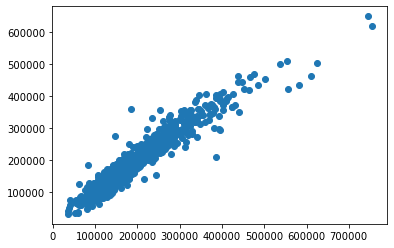

In [107]:
plt.scatter(ytrain,ygorro)

# Probando con la base test

In [108]:
ygorrotest = lasso.predict(Xtest)
ygorrotest

array([111925.76107905, 168608.11494094, 186806.10640742, ...,
       173887.34545318, 110457.10675563, 222513.35407205])

Acontinuación se grafica la estimación del precio de venta de la base de datos test usando el modelo lasso contra el precio estimado de la base de datos 

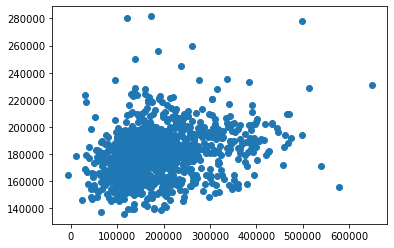

In [109]:
plt.scatter(ygorrotest,sample_submission['SalePrice'])

## Conclusión 

Existe demasiada dispersión entre los precios estimados del modelo lasso obtenido en el presente análisis comparado con la estimación proporcionada en la base de datos ample_submission.